<a href="https://colab.research.google.com/github/dinasquare/AIML_Work/blob/main/Credit_Card_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# df['Geography'].value_counts()
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
X=df.drop(columns=['Exited'])
y=df['Exited'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# without scaling convergence is not good
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11)) #input layer
model.add(Dense(1,activation='sigmoid')) #output layer
# adding more layers may lead to overfitting

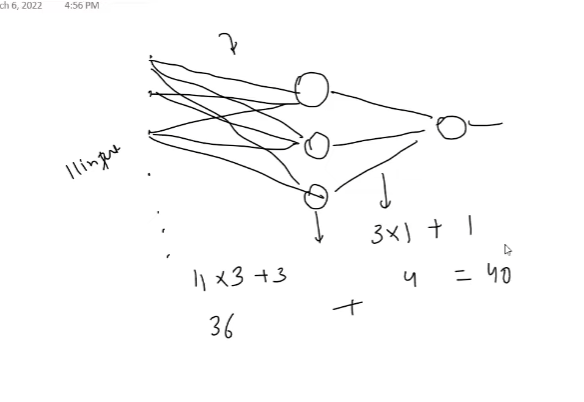

This has 11 inputs with 3 nodes and each node has one bias so total

11 inputs * 3 nodes = 33 + 3bias = 36

for second layer we have 3 inputs from previous layer and 1 node which is the output node and it will have 1 bias so totaal of second layer is

3 inputs * 1 node = 3 + 1bias = 4

total parameters become = 36+4 = 40


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [ ]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4334
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4304
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4277
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4250
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4225
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4201
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4180
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4160
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4140
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4123
Epoch 11/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4106
Epoch 12/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4090
Epoch 13/100


In [ ]:
model.layers[0].get_weights()

[array([[ 6.3404679e-02,  1.7246126e-01, -7.4059650e-02],
        [ 1.2373530e+00, -2.9415543e+00,  1.6685759e-03],
        [ 2.9740393e-01,  1.5270820e-01, -1.4789571e-01],
        [ 8.2742906e-01,  1.4503978e-02, -5.8975053e-01],
        [ 5.3319836e+00, -8.6766446e-01, -1.1197991e+00],
        [ 5.4813284e-02,  3.7556738e-02, -5.0978757e-02],
        [ 1.0894064e+00, -5.6389600e-01,  1.8874400e+00],
        [-1.2460736e-01,  3.0183583e-02, -6.6069089e-02],
        [-7.2750175e-01, -2.5533444e-01, -7.5084746e-01],
        [ 4.6981817e-01,  6.1259489e-04, -4.3962982e-01],
        [ 1.4434788e-01, -8.3994485e-02,  1.1388162e+00]], dtype=float32),
 array([1.614486  , 0.35801676, 0.45637828], dtype=float32)]

In [ ]:
y_log=model.predict(x_test)
#this gives output in form of probability as we have given sigmoid functiony

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred=np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.855